# 图像几何变换

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
src = cv2.imread('../datas/f4.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

## 1.旋转无缩放

In [4]:
rows,cols = gray.shape

In [5]:
rotate_matrix = cv2.getRotationMatrix2D(center = (cols // 2,rows // 2),angle=60,scale=1)
dst_rotate = cv2.warpAffine(rgb,rotate_matrix,(rows ,cols))

Text(0.5,1,'Rotate:60')

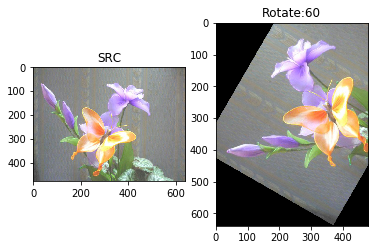

In [6]:
plt.subplot(121)
plt.imshow(rgb)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst_rotate)
plt.title('Rotate:60')

## 2.平移

In [7]:
translation_matrix = np.array([
    [1,0,100],
    [0,1,50]
],dtype=np.float32)

dst_transform = cv2.warpAffine(rgb,translation_matrix,(rows+200,cols+200),borderValue=(155,155,155))

Text(0.5,1,'Transform:x->100,y->50')

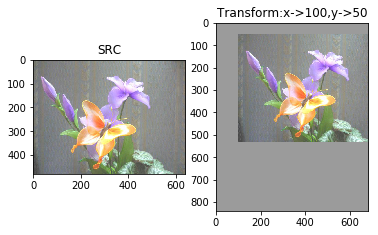

In [8]:
plt.subplot(121)
plt.imshow(rgb)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst_transform)
plt.title('Transform:x->100,y->50')

注意，有时候我们在变换后的图像上完成了处理得到了特征点，现在需要获得对应的在原图上的坐标，这时候使用cv2.invertAffineTransform可以得到变换矩阵的逆矩阵(也可以利用Numpy.linalg.inv求解，需要转homogeneous)，将点左乘逆矩阵即可得到原图坐标。

## 3.仿射变换（Affine)

In [9]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
affine_matrix = cv2.getAffineTransform(pts1,pts2)
dst_affine = cv2.warpAffine(rgb, affine_matrix, (cols, rows))

Text(0.5,1,'Affine Transform')

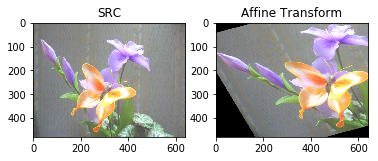

In [10]:
plt.subplot(121)
plt.imshow(rgb)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst_affine)
plt.title('Affine Transform')

## 4.投影(Perspective)

In [11]:
pts3 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts4 = np.float32([[0,0],[300,0],[0,300],[300,300]])
perspective_mat = cv2.getPerspectiveTransform(pts3,pts4)
dst_perspective = cv2.warpPerspective(rgb, perspective_mat, (cols, rows))

Text(0.5,1,'Perjective Transform')

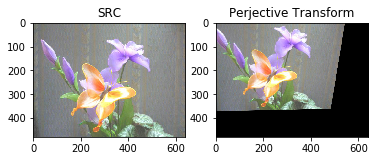

In [12]:
plt.subplot(121)
plt.imshow(rgb)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst_perspective)
plt.title('Perjective Transform')

## 5.图像重映射

In [13]:
img_x = np.zeros((rows,cols),np.float32)
img_y = np.zeros((rows,cols),np.float32)
# 坐标映射
for y in range(rows):
    for x in range(cols):
        img_y[y,x] = rows - y
        img_x[y,x] = cols - x

In [14]:
dst = cv2.remap(rgb,img_x,img_y,cv2.INTER_LINEAR)

Text(0.5,1,'Remap')

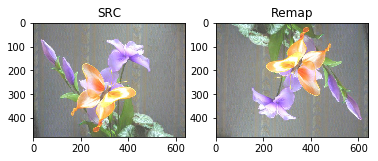

In [15]:
plt.subplot(121)
plt.imshow(rgb)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Remap')

## 6.扭曲

In [20]:
angle = 1. / np.tan(np.pi / 3.)
mat = np.float32([ 1, angle, 0, 0, 1, 0]).reshape((2,3))
rows,cols = src.shape[0],src.shape[1]
dst = cv2.warpAffine(rgb,mat,(cols+ int(cols * 0.5),rows))

Text(0.5,1,'Skew')

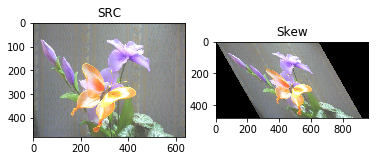

In [21]:
plt.subplot(121)
plt.imshow(rgb)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Skew')

## 7.镜像

In [23]:
rows,cols = src.shape[0],src.shape[1]
mh = np.float32([ -1, 0, cols, 0, 1, 0]).reshape((2,3))
mv = np.float32([1, 0, 0, 0, -1, rows]).reshape((2,3))
mat = np.float32([ -1, 0, cols, 0, -1, rows]).reshape((2,3))
dstx = cv2.warpAffine(rgb,mh,(cols,rows))
dsty = cv2.warpAffine(rgb,mv,(cols,rows))
dstxy = cv2.warpAffine(rgb,mat,(cols,rows))

Text(0.5,1,'Reflection XY')

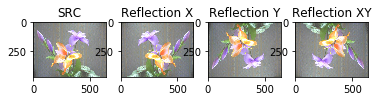

In [24]:
plt.subplot(141)
plt.imshow(rgb)
plt.title('SRC')
plt.subplot(142)
plt.imshow(dstx)
plt.title('Reflection X')
plt.subplot(143)
plt.imshow(dsty)
plt.title('Reflection Y')
plt.subplot(144)
plt.imshow(dstxy)
plt.title('Reflection XY')